**Group Members**

1.Pisuttipong Mekdang (6220422083)

2.Wuttipon Assawaniramol (6220422076)

3.Thanisorn Saraphan (6220422060)

# **Load Dependencies**

In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 43.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 30.9 MB/s 
     |████████████████████████████████| 1.3 MB 16.4 MB/s 
     |████████████████████████████████| 6.8 MB 27.1 MB/s 
     |████████████████████████████████| 261 kB 33.4 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 15.5 MB 44.5 MB/s 
     |████████████████████████████████| 167 kB 43.5 MB/s 
     |████████████████████████████████| 2.0 MB 24.0 MB/s 
     |████████████████████████████████| 10.1 MB 45.8 MB/s 
     |████████████████████████████████| 3.1 MB 38.3 MB/s 
     |████████████████████████████████| 596 kB 40.0 MB/s 
     |████████████████

In [2]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [4]:
df = pd.read_csv('/content/Supermarket Data.csv')

In [5]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [6]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
29534,200622,2006-07-26,4,14,1,0.8,PRD0900212,CL00044,DEP00011,G00004,D00002,CUST0000105820,LA,OF,9.941016e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02
29535,200611,2006-05-14,1,11,1,0.8,PRD0900212,CL00044,DEP00011,G00004,D00002,CUST0000937338,UM,YA,9.941005e+14,M,UM,Small Shop,Fresh,STORE00001,LS,E02
29536,200733,2007-10-08,2,19,1,0.8,PRD0900212,CL00044,DEP00011,G00004,D00002,CUST0000517169,LA,YA,9.941079e+14,L,LA,Full Shop,Fresh,STORE00001,LS,E02
29537,200618,2006-06-28,4,14,1,0.8,PRD0900212,CL00044,DEP00011,G00004,D00002,CUST0000337192,LA,OF,9.941012e+14,M,MM,Small Shop,Fresh,STORE00001,LS,E02
29538,200803,2008-03-15,7,17,1,0.8,PRD0900212,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29539 entries, 0 to 29538
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SHOP_WEEK                 29539 non-null  int64         
 1   SHOP_DATE                 29539 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              29539 non-null  int64         
 3   SHOP_HOUR                 29539 non-null  int64         
 4   QUANTITY                  29539 non-null  int64         
 5   SPEND                     29539 non-null  float64       
 6   PROD_CODE                 29539 non-null  object        
 7   PROD_CODE_10              29539 non-null  object        
 8   PROD_CODE_20              29538 non-null  object        
 9   PROD_CODE_30              29538 non-null  object        
 10  PROD_CODE_40              29538 non-null  object        
 11  CUST_CODE                 24992 non-null  object        
 12  CUST_PRICE_SENSITI

# **Prepare customer single view**

# Calculate features

In [8]:
from scipy import stats

In [9]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalProd=('PROD_CODE', 'nunique'),
                                                                                  SHOP_WEEKDAYS=('SHOP_WEEKDAY',lambda x: stats.mode(x)[0][0]),
                                                                                  SHOP_HOURS = ('SHOP_HOUR',lambda x: stats.mode(x)[0][0]),
                                                                                  BASKET_DOMINANT = ('BASKET_DOMINANT_MISSION',lambda x: stats.mode(x)[0][0])
                                                                                  ).reset_index()

In [10]:
df_csv

,CUST_CODE,TotalSpend,TotalVisits,TotalProd,SHOP_WEEKDAYS,SHOP_HOURS,BASKET_DOMINANT
0,CUST0000000689,7.12,6,4,1,21,Mixed
1,CUST0000001163,4.38,1,2,1,15,Fresh
2,CUST0000001194,81.22,33,19,6,19,Fresh
3,CUST0000002637,16.29,6,4,1,16,Fresh
4,CUST0000002813,13.65,6,6,3,20,Fresh
...,...,...,...,...,...,...,...
1859,CUST0000998450,40.32,2,1,1,10,Grocery
1860,CUST0000999024,8.66,6,8,1,13,Mixed
1861,CUST0000999593,18.91,11,10,6,15,Fresh
1862,CUST0000999935,28.23,8,11,4,16,Fresh


In [11]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [12]:
df_csv['BASKET_DOMINANT'].replace({'Grocery':0,'Fresh':1,'Mixed':2,'Nonfood':3,'XX':4},inplace=True)

In [13]:
#Feature
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalProd,SHOP_WEEKDAYS,SHOP_HOURS,BASKET_DOMINANT,TicketSize
0,CUST0000000689,7.12,6,4,1,21,2,1.186667
1,CUST0000001163,4.38,1,2,1,15,1,4.380000
2,CUST0000001194,81.22,33,19,6,19,1,2.461212
3,CUST0000002637,16.29,6,4,1,16,1,2.715000
4,CUST0000002813,13.65,6,6,3,20,1,2.275000


# **Cluster customers**

In [14]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE'], normalize=True)

,Description,Value
0,session_id,1361
1,Original Data,"(1864, 8)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1864, 29)"
9,CPU Jobs,-1


In [15]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [16]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f1ce04e9ef0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f1ce00...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f1ce001b290>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f1ce04c7f80>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f1ce04c7d40>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f1ce04cd050>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [17]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0179,48.5357,3.5036,0,0,0


In [18]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.590500,78.944800,0.454100,0,0,0
birch,0.355100,403.665600,1.086200,0,0,0
kmeans,0.282700,452.697100,1.322000,0,0,0
ap,0.280500,45.885600,1.281300,0,0,0
hclust,0.229600,404.316900,1.529300,0,0,0
kmodes,0.017900,48.535700,3.503600,0,0,0
dbscan,-0.112300,4.571400,1.377500,0,0,0


# Spectral Clustering Clustering

In [19]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5905,78.9448,0.4541,0,0,0


In [20]:
plot_model(sc)

# AP

In [22]:
ap = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2805,45.8856,1.2813,0,0,0


In [23]:
plot_model(ap)

# KMeans Clustering

In [24]:
kmeans = create_model('kmeans',num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1499,413.6888,1.6817,0,0,0


In [25]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1361, tol=0.0001, verbose=0)


In [26]:
plot_model(kmeans)

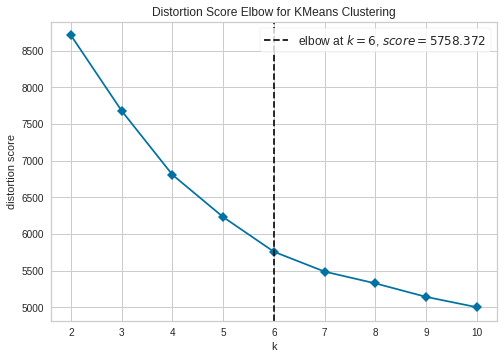

In [27]:
plot_model(kmeans, plot = 'elbow')

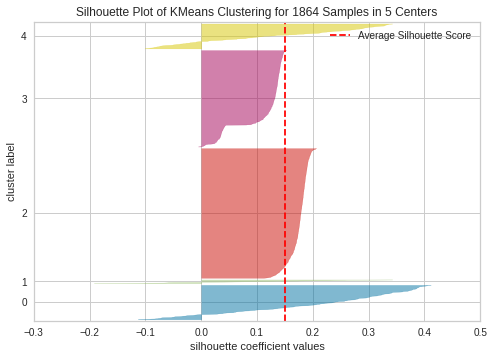

In [28]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [29]:
kmeans_df = assign_model(kmeans)
kmeans_df

,CUST_CODE,TotalSpend,TotalVisits,TotalProd,SHOP_WEEKDAYS,SHOP_HOURS,BASKET_DOMINANT,TicketSize,Cluster
0,CUST0000000689,7.12,6,4,1,21,2,1.186667,Cluster 3
1,CUST0000001163,4.38,1,2,1,15,1,4.380000,Cluster 2
2,CUST0000001194,81.22,33,19,6,19,1,2.461212,Cluster 0
3,CUST0000002637,16.29,6,4,1,16,1,2.715000,Cluster 2
4,CUST0000002813,13.65,6,6,3,20,1,2.275000,Cluster 2
...,...,...,...,...,...,...,...,...,...
1859,CUST0000998450,40.32,2,1,1,10,0,20.160000,Cluster 4
1860,CUST0000999024,8.66,6,8,1,13,2,1.443333,Cluster 3
1861,CUST0000999593,18.91,11,10,6,15,1,1.719091,Cluster 2
1862,CUST0000999935,28.23,8,11,4,16,1,3.528750,Cluster 2


# **Interpret results and plan for actions**

In [30]:
#Crate data frame
X = kmeans_df.drop(['Cluster','CUST_CODE'],axis=1)
y = kmeans_df.Cluster

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth = 4,random_state = 0)
model.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

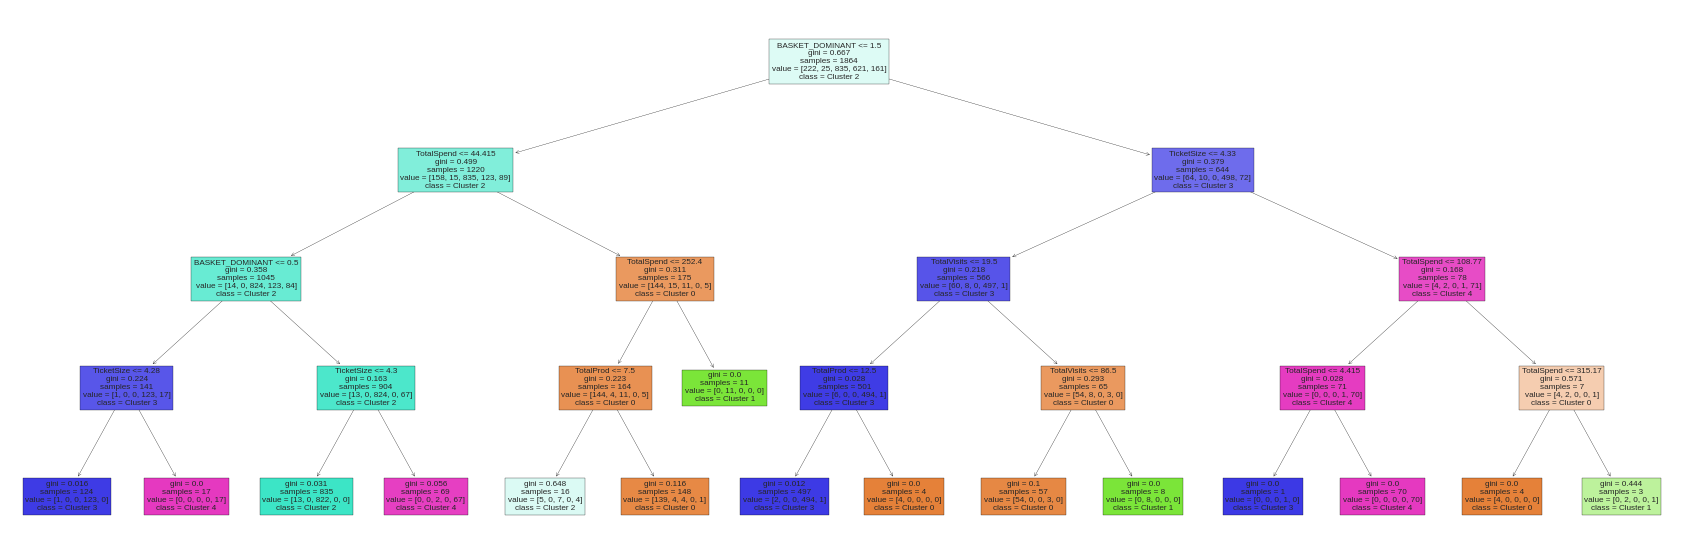

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
tree.plot_tree(model,feature_names=X.columns,class_names=model.classes_.astype(str),filled=True)
plt.show()

Conclusion

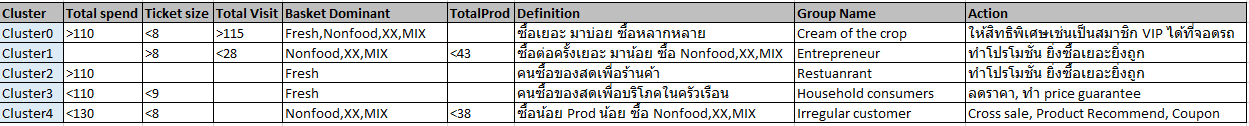